In [1]:
import cv2
from brisque import BRISQUE
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

## 1 part

In [7]:
def get_image_size(image_path):
    img = cv2.imread(image_path)
    return os.path.getsize(image_path), img.shape[1], img.shape[0]  # File size, width, height

def save_image_in_different_formats(input_path):
    image = cv2.imread(input_path)
    file_name_without_extension = os.path.splitext(os.path.basename(input_path))[0]
    output_folder = 'output'
    os.makedirs(output_folder, exist_ok=True)

    # Save as JPEG
    output_jpg = os.path.join(output_folder, file_name_without_extension + '_output.jpg')
    cv2.imwrite(output_jpg, image)

    # Save as Bitmap (BMP)
    output_bmp = os.path.join(output_folder, file_name_without_extension + '_output.bmp')
    cv2.imwrite(output_bmp, image)

    # Save as PNG
    output_png = os.path.join(output_folder, file_name_without_extension + '_output.png')
    cv2.imwrite(output_png, image)

    return output_jpg, output_bmp, output_png

def create_experiment_table(images):
    table = []

    for i, image_path in enumerate(images, start=1):
        file_type = image_path.split('.')[-1].upper()

        # Get image dimensions
        img = cv2.imread(image_path)
        obj = BRISQUE(url=False)
        size = img.size
        quality_score = str(obj.score(img))
        photo_size = (img.shape[1], img.shape[0])  # Width, Height

        # Get file size
        file_size = os.path.getsize(image_path)

        # Append data to the table
        table.append({
            'Experiment Number': i,
            'File Type': file_type,
            'Photo Size': photo_size,
            'Photo Size Units' : 'pixels',
            'File Size': file_size,
            'File Size Units': 'bytes',
            'Quality score' : quality_score
        })

    return table

def print_latex_table(data):
    headers = list(data[0].keys())
    
    # Print LaTeX table header
    print('\\begin{table}[h]')
    print('\\centering')
    print('\\begin{tabular}{|' + 'c|' * len(headers) + '} \\hline')

    # Print column headers
    print(' & '.join(headers) + ' \\\\ \\hline')

    # Print table rows
    for row in data:
        values = [str(row[header]) for header in headers]
        print(' & '.join(values) + ' \\\\ \\hline')

    # Print LaTeX table footer
    print('\\end{tabular}')
    print('\\caption{Experiment Results}')
    print('\\end{table}')

In [28]:
input_path = 'photo.jpeg'
output_jpg, output_bmp, output_png = save_image_in_different_formats(input_path)

In [29]:
photos = [output_jpg, output_bmp, output_png]
experiment_table = create_experiment_table(photos)
for row in experiment_table:
    print(row)

{'Experiment Number': 1, 'File Type': 'JPG', 'Photo Size': (3024, 4032), 'Photo Size Units': 'pixels', 'File Size': 2864187, 'File Size Units': 'bytes', 'Quality score': '64.15440396735104'}
{'Experiment Number': 2, 'File Type': 'BMP', 'Photo Size': (3024, 4032), 'Photo Size Units': 'pixels', 'File Size': 36578358, 'File Size Units': 'bytes', 'Quality score': '64.2212663950904'}
{'Experiment Number': 3, 'File Type': 'PNG', 'Photo Size': (3024, 4032), 'Photo Size Units': 'pixels', 'File Size': 16958359, 'File Size Units': 'bytes', 'Quality score': '64.2212663950904'}


In [5]:
print_latex_table(experiment_table)

\begin{table}[h]
\centering
\begin{tabular}{|c|c|c|c|c|c|c|} \hline
Experiment Number & File Type & Photo Size & Photo Size Units & File Size & File Size Units & Quality score \\ \hline
1 & JPG & (3024, 4032) & pixels & 2864187 & bytes & 64.15440396735104 \\ \hline
2 & BMP & (3024, 4032) & pixels & 36578358 & bytes & 64.2212663950904 \\ \hline
3 & PNG & (3024, 4032) & pixels & 16958359 & bytes & 64.2212663950904 \\ \hline
\end{tabular}
\caption{Experiment Results}
\end{table}


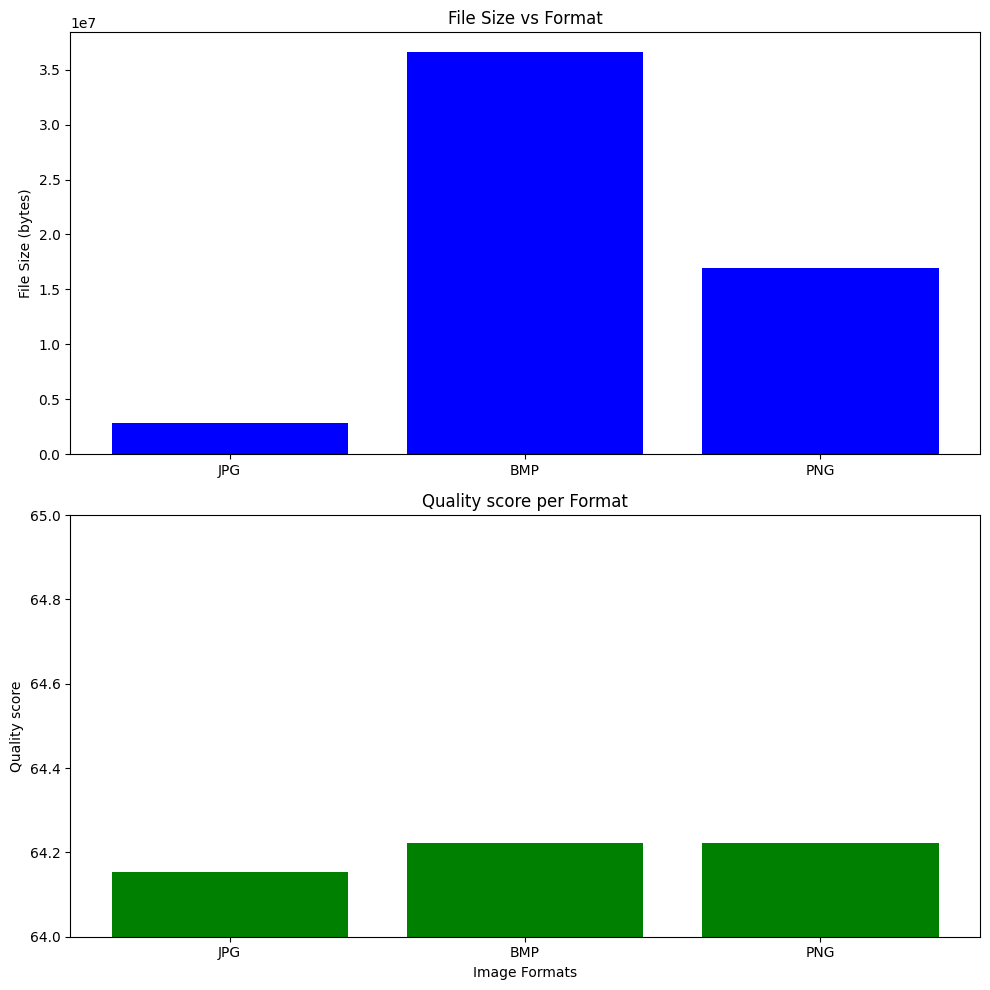

In [33]:
formats = [experiment['File Type'] for experiment in experiment_table]
file_sizes = [experiment['File Size'] for experiment in experiment_table]
quality = [float(experiment['Quality score']) for experiment in experiment_table]

# Creating two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Histogram for File Sizes
axs[0].bar(formats, file_sizes, color='blue')
axs[0].set_ylabel('File Size (bytes)')
axs[0].set_title('File Size vs Format')

# Histogram for Image Widths
axs[1].bar(formats, quality, color='green')
axs[1].set_xlabel('Image Formats')
axs[1].set_ylabel('Quality score')
axs[1].set_title('Quality score per Format')
axs[1].set_ylim([64,65])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


## 2 part

In [2]:
output_folder = 'output_video'
os.makedirs(output_folder, exist_ok=True)

In [21]:
cap = cv2.VideoCapture(1)
cv2.namedWindow('frame', 0)
cv2.resizeWindow('frame', 300, 300)

# Set the desired duration and calculate the number of frames
desired_duration = 4.0  # seconds
frame_rate = 20.0
total_frames = int(desired_duration * frame_rate)

# Define output file names for each format
output_i420 = os.path.join(output_folder, 'output_i420.avi')
output_mp4 = os.path.join(output_folder, 'output.mp4')
output_divx = os.path.join(output_folder, 'output_divx.avi')
output_flv = os.path.join(output_folder, 'output.flv')
output_xvid = os.path.join(output_folder, 'output_xvid.avi')

# Define fourcc codes for each format
fourcc_i420 = cv2.VideoWriter_fourcc(*'I420')
fourcc_mp4 = cv2.VideoWriter_fourcc(*'mp4v')
fourcc_divx = cv2.VideoWriter_fourcc(*'DIVX')
fourcc_flv = cv2.VideoWriter_fourcc(*'FLV1')
fourcc_xvid = cv2.VideoWriter_fourcc(*'XVID')

# Create VideoWriter instances for each format
out_i420 = cv2.VideoWriter(output_i420, fourcc_i420, frame_rate, (300, 300))
out_mp4 = cv2.VideoWriter(output_mp4, fourcc_mp4, frame_rate, (300, 300))
out_divx = cv2.VideoWriter(output_divx, fourcc_divx, frame_rate, (300, 300))
out_flv = cv2.VideoWriter(output_flv, fourcc_flv, frame_rate, (300, 300))
out_xvid = cv2.VideoWriter(output_xvid, fourcc_xvid, frame_rate, (300, 300))

frame_count = 0

while cap.isOpened() and frame_count < total_frames:
    ret, frame = cap.read()
    if ret:
        vidout = cv2.resize(frame, (300, 300))
        
        # Write frames to each VideoWriter instance
        out_i420.write(vidout)
        out_mp4.write(vidout)
        out_divx.write(vidout)
        out_flv.write(vidout)
        out_xvid.write(vidout)
        
        cv2.imshow('frame', frame)
        frame_count += 1
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
out_i420.release()
out_mp4.release()
out_divx.release()
out_flv.release()
out_xvid.release()

cv2.destroyWindow('frame')
cv2.waitKey(4)
cv2.destroyAllWindows()

actual_duration = frame_count / frame_rate
print(f"Actual video duration: {actual_duration:.2f} seconds")

OpenCV: FFMPEG: tag 0x31564c46/'FLV1' is not supported with codec id 21 and format 'flv / FLV (Flash Video)'
OpenCV: FFMPEG: fallback to use tag 0x00000002/'????'


Actual video duration: 4.00 seconds


In [23]:
video_attempts_list = []

def record_existing_attempt(video_format, output_file):
    attempt_info = {}

    output_path = os.path.join(output_folder, output_file)
    file_size = os.path.getsize(output_path)

    # Record attempt information
    attempt_info['Format'] = video_format
    attempt_info['File'] = output_file
    attempt_info['Duration'] = cv2.VideoCapture(output_path).get(cv2.CAP_PROP_FRAME_COUNT) / cv2.VideoCapture(output_path).get(cv2.CAP_PROP_FPS)
    attempt_info['FPS'] = cv2.VideoCapture(output_path).get(cv2.CAP_PROP_FPS)
    attempt_info['Video Size'] = (300, 300)
    attempt_info['File Size'] = file_size

    # Append attempt information to the list
    video_attempts_list.append(attempt_info)

# Record attempts for each existing video
record_existing_attempt('i420 (avi)', 'output_i420.avi')
record_existing_attempt('mp4', 'output.mp4')
record_existing_attempt('DivX (avi)', 'output_divx.avi')
record_existing_attempt('flv', 'output.flv')
record_existing_attempt('xvid (avi)', 'output_xvid.avi')

# Create a DataFrame from the list of attempts
video_attempts_df = pd.DataFrame(video_attempts_list)

# Display the DataFrame
print("\nVideo Attempts DataFrame:")
print(video_attempts_df)



Video Attempts DataFrame:
       Format             File  Duration   FPS  Video Size  File Size
0  i420 (avi)  output_i420.avi       4.0  20.0  (300, 300)   10807606
1         mp4       output.mp4       4.0  20.0  (300, 300)     195272
2  DivX (avi)  output_divx.avi       4.0  20.0  (300, 300)     202112
3         flv       output.flv       4.0  20.0  (300, 300)     227414
4  xvid (avi)  output_xvid.avi       4.0  20.0  (300, 300)     202112


In [24]:
def calculate_quality_score(image_path):
    obj = BRISQUE(url=False)
    img = cv2.imread(image_path)
    score = float(obj.score(img))
    return score

# Initialize a list to store attempt dictionaries
video_attempts_list_png = []

def record_existing_attempt(video_format, output_file):
    attempt_info = {}
    output_path = os.path.join(output_folder, output_file)
    file_size = os.path.getsize(output_path)

    # Record attempt information
    attempt_info['Format'] = video_format
    attempt_info['File'] = output_file
    attempt_info['Duration'] = cv2.VideoCapture(output_path).get(cv2.CAP_PROP_FRAME_COUNT) / cv2.VideoCapture(output_path).get(cv2.CAP_PROP_FPS)
    attempt_info['FPS'] = cv2.VideoCapture(output_path).get(cv2.CAP_PROP_FPS)
    attempt_info['Video Size'] = (300, 300)
    attempt_info['File Size'] = file_size

    # Extract one frame from the video
    cap = cv2.VideoCapture(output_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, 49)
    ret, frame = cap.read()
    cap.release()

    frame_output_path = os.path.join(output_folder, f'{output_file}_frame_{video_format.lower()}.png')
    cv2.imwrite(frame_output_path, frame)
    attempt_info['Quality Score'] = calculate_quality_score(frame_output_path)
    video_attempts_list_png.append(attempt_info)

# Record attempts for each existing video
record_existing_attempt('i420', 'output_i420.avi')
record_existing_attempt('mp4', 'output.mp4')
record_existing_attempt('DivX', 'output_divx.avi')
record_existing_attempt('flv', 'output.flv')
record_existing_attempt('xvid', 'output_xvid.avi')

In [25]:
print_latex_table(video_attempts_list_png)

\begin{table}[h]
\centering
\begin{tabular}{|c|c|c|c|c|c|c|} \hline
Format & File & Duration & FPS & Video Size & File Size & Quality Score \\ \hline
i420 & output_i420.avi & 4.0 & 20.0 & (300, 300) & 10807606 & 19.493549987769114 \\ \hline
mp4 & output.mp4 & 4.0 & 20.0 & (300, 300) & 195272 & 35.17145799932402 \\ \hline
DivX & output_divx.avi & 4.0 & 20.0 & (300, 300) & 202112 & 35.17145799932402 \\ \hline
flv & output.flv & 4.0 & 20.0 & (300, 300) & 227414 & 35.51436615997008 \\ \hline
xvid & output_xvid.avi & 4.0 & 20.0 & (300, 300) & 202112 & 35.17145799932402 \\ \hline
\end{tabular}
\caption{Experiment Results}
\end{table}


In [26]:
pd.DataFrame(video_attempts_list_png)

,Format,File,Duration,FPS,Video Size,File Size,Quality Score
0,i420,output_i420.avi,4.0,20.0,"(300, 300)",10807606,19.493550
1,mp4,output.mp4,4.0,20.0,"(300, 300)",195272,35.171458
2,DivX,output_divx.avi,4.0,20.0,"(300, 300)",202112,35.171458
3,flv,output.flv,4.0,20.0,"(300, 300)",227414,35.514366
4,xvid,output_xvid.avi,4.0,20.0,"(300, 300)",202112,35.171458


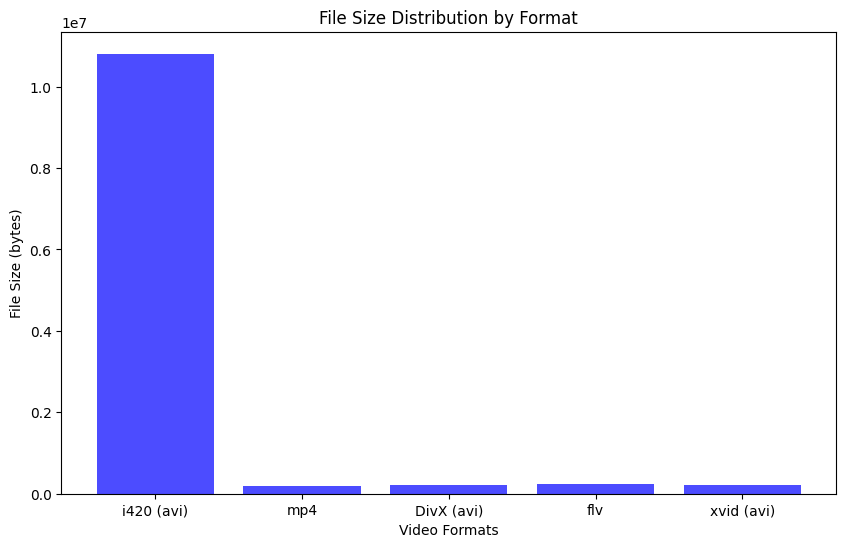

In [27]:
formats = [experiment['Format'] for experiment in video_attempts_list]
sizes = [experiment['File Size'] for experiment in video_attempts_list]

plt.figure(figsize=(10, 6))
plt.bar(formats, sizes, color='blue', alpha=0.7)

# Customize the plot
plt.xlabel('Video Formats')
plt.ylabel('File Size (bytes)')
plt.title('File Size Distribution by Format')

# Show the plot
plt.show()

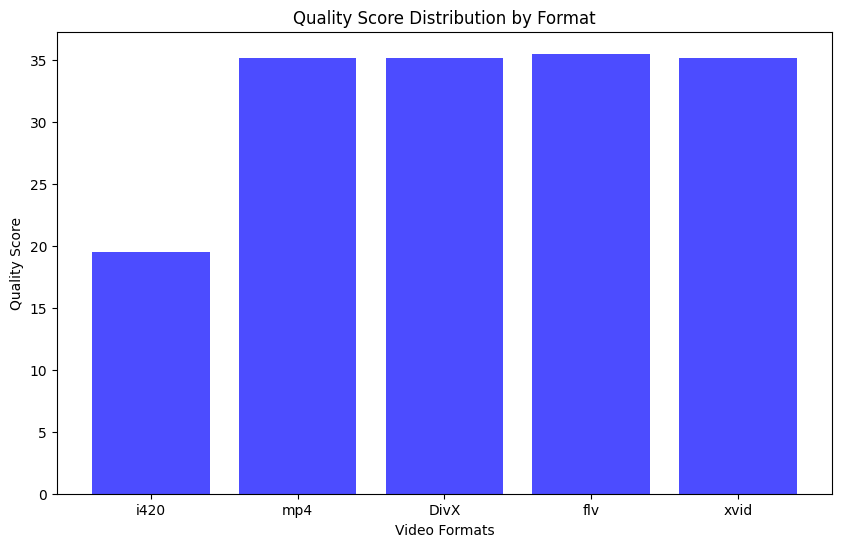

: 

In [29]:
formats = [experiment['Format'] for experiment in video_attempts_list_png]
sizes = [experiment['Quality Score'] for experiment in video_attempts_list_png]

plt.figure(figsize=(10, 6))
plt.bar(formats, sizes, color='blue', alpha=0.7)

# Customize the plot
plt.xlabel('Video Formats')
plt.ylabel('Quality Score')
plt.title('Quality Score Distribution by Format')

# Show the plot
plt.show()

## 3 part

In [7]:
def save_image_in_grey(input_path):
    image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE )
    file_name_without_extension = os.path.splitext(os.path.basename(input_path))[0]
    output_folder = 'output_grey'
    os.makedirs(output_folder, exist_ok=True)

    # Save as JPEG
    output_jpg = os.path.join(output_folder, file_name_without_extension + '_output.jpg')
    cv2.imwrite(output_jpg, image)

    # Save as Bitmap (BMP)
    output_bmp = os.path.join(output_folder, file_name_without_extension + '_output.bmp')
    cv2.imwrite(output_bmp, image)

    # Save as PNG
    output_png = os.path.join(output_folder, file_name_without_extension + '_output.png')
    cv2.imwrite(output_png, image)

    return output_jpg, output_bmp, output_png

In [8]:
input_path = 'photo.jpeg'
output_jpg, output_bmp, output_png = save_image_in_grey(input_path)

In [9]:
photos = [output_jpg, output_bmp, output_png]
experiment_table_grey = create_experiment_table(photos)
for row in experiment_table_grey:
    print(row)

{'Experiment Number': 1, 'File Type': 'JPG', 'Photo Size': (3024, 4032), 'Photo Size Units': 'pixels', 'File Size': 2594638, 'File Size Units': 'bytes', 'Quality score': '64.39930242736202'}
{'Experiment Number': 2, 'File Type': 'BMP', 'Photo Size': (3024, 4032), 'Photo Size Units': 'pixels', 'File Size': 12193846, 'File Size Units': 'bytes', 'Quality score': '64.57409020877455'}
{'Experiment Number': 3, 'File Type': 'PNG', 'Photo Size': (3024, 4032), 'Photo Size Units': 'pixels', 'File Size': 6358790, 'File Size Units': 'bytes', 'Quality score': '64.57409020877455'}


In [24]:
print_latex_table(experiment_table_grey)

\begin{table}[h]
\centering
\begin{tabular}{|c|c|c|c|c|c|c|} \hline
Experiment Number & File Type & Photo Size & Photo Size Units & File Size & File Size Units & Quality score \\ \hline
1 & JPG & (3024, 4032) & pixels & 2594638 & bytes & 64.39930242736202 \\ \hline
2 & BMP & (3024, 4032) & pixels & 12193846 & bytes & 64.57409020877455 \\ \hline
3 & PNG & (3024, 4032) & pixels & 6358790 & bytes & 64.57409020877455 \\ \hline
\end{tabular}
\caption{Experiment Results}
\end{table}


In [34]:
12193846/6358790

1.9176362169532253

In [21]:
file_sizes_grey = [experiment['File Size'] for experiment in experiment_table_grey]
quality_grey = [float(experiment['Quality score']) for experiment in experiment_table_grey]

In [15]:
max(file_sizes)

36578358

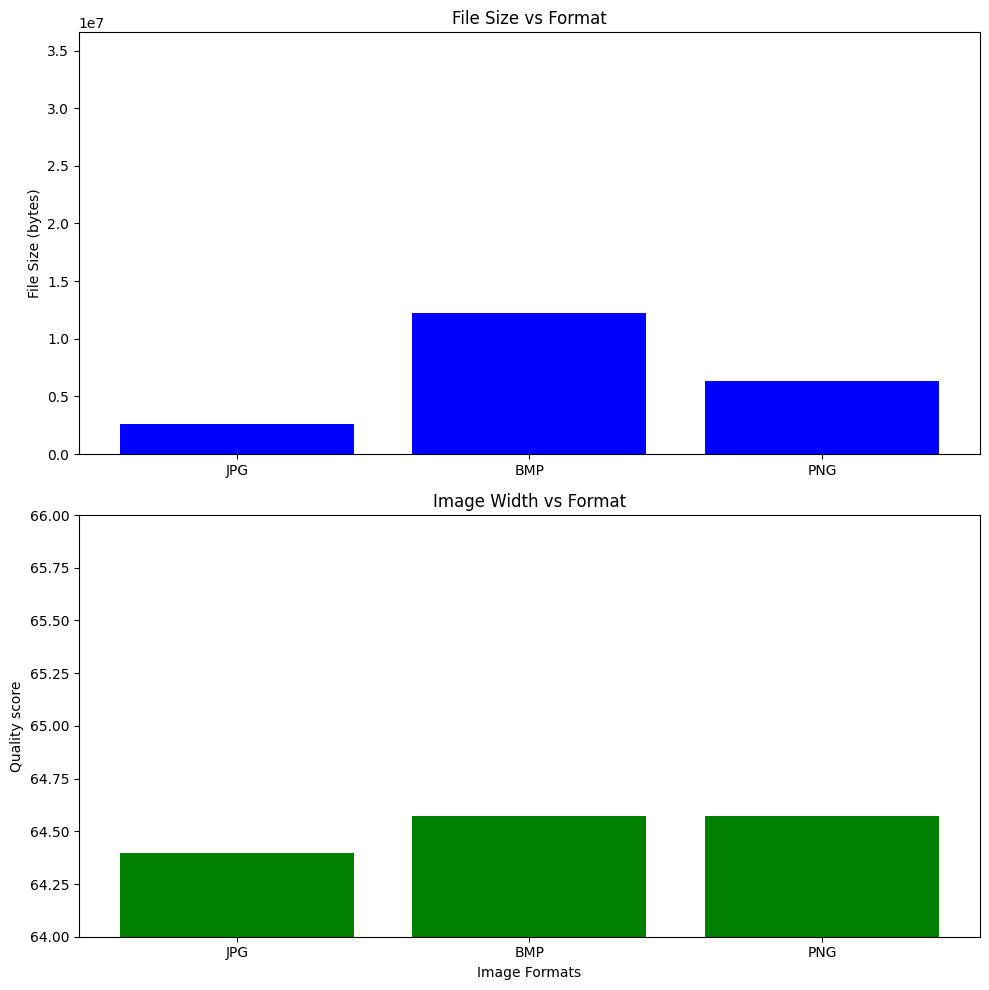

In [25]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Histogram for File Sizes
axs[0].bar(formats, file_sizes_grey, color='blue')
axs[0].set_ylabel('File Size (bytes)')
axs[0].set_title('File Size vs Format')
axs[0].set_ylim([0,max(file_sizes)])

# Histogram for Image Widths
axs[1].bar(formats, quality_grey, color='green')
axs[1].set_xlabel('Image Formats')
axs[1].set_ylabel('Quality score')
axs[1].set_title('Image Width vs Format')
axs[1].set_ylim([64,66])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()